In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from itertools import cycle

os.chdir("../scripts")

In [17]:
from aux_NonLinCFA import prepare_features
from clustering_operations import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Clustering FAPAN only considering August where there are more data avaliable, only considering observations that are available for every year

In [18]:
def plot_clusters(output, figsize=(16,10), s=1, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []

    cmap = plt.cm.colors.ListedColormap(np.random.rand(len(output), 3))
    markers = cycle(['o', 's', '^', 'v', 'D', 'p', 'h'])

    plt.figure(figsize=figsize)
    #plt.title(title, fontsize = 12)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    # iterate over all the features aggregations
    for j in range (len(output)):       # j iterates all the clusters
        X = [float(element.split('_')[0]) for element in output[j]]
        Y = [float(element.split('_')[1]) for element in output[j]]
        marker = next(markers)
        plt.scatter(X, Y, s=s, color=cmap(j), marker=marker)

In [19]:
df = pd.read_csv("../data/FAPAN_august_no_nan.csv")
df = df.iloc[:,1:]
df = df.drop_duplicates() # There is one duplicate!

In [20]:
df = df[(df['x'] >= 5) & (df['x'] <= 20) & (df['y'] >= 35) & (df['y'] <= 50)]

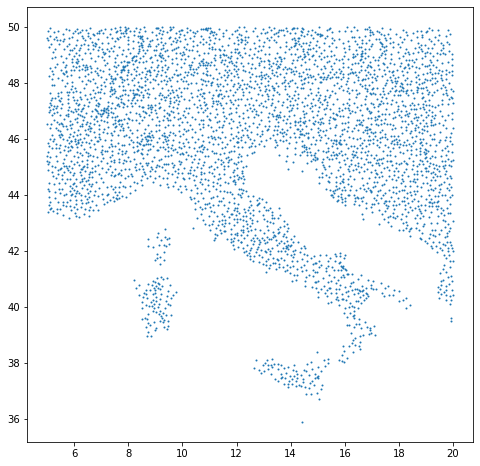

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(df['x'], df['y'], s=1)

In [22]:
transposed_df = df.T
df = pd.DataFrame(transposed_df.values, columns=[str(transposed_df.iloc[0, i]) + '_' + str(transposed_df.iloc[1, i]) for i in range(len(transposed_df.columns))])
df.drop([0, 1], inplace=True)
df.reset_index(drop=True, inplace=True)

In [26]:
print(df.shape)
df.head()

(17, 4089)


,8.9291_44.4667,14.1867_37.3508,13.9083_37.2542,14.1875_37.7167,13.9458_37.3458,14.0808_37.7575,14.2175_37.4775,14.2333_37.6225,14.1242_37.525,14.0342_37.4175,...,15.2267_45.0083,14.7558_45.225,18.9567_42.3508,16.025_41.8417,13.3475_43.0083,14.2625_42.3125,13.0267_43.5542,13.2242_46.0325,13.2908_43.4042,13.5525_43.5192
0,0.453222,-1.879933,-2.326556,-1.113583,-2.238333,-1.522111,-1.853000,-1.883111,-1.791111,-2.009667,...,-0.150200,0.008308,0.392889,-0.467952,0.419037,0.226533,1.334083,0.847030,0.669190,0.643889
1,-0.248556,-0.794000,-0.634000,-0.704583,-0.681500,-0.742889,-0.693000,-0.530000,-0.484889,-0.739167,...,-0.370733,-0.665385,-0.781889,-0.580476,-0.762000,-0.253533,-1.314208,-1.886212,-1.492048,-1.731778
2,-0.940833,-0.110667,0.114889,0.689417,0.239500,0.443333,0.122833,0.070556,-0.062111,-0.091083,...,0.118933,-0.633795,0.117000,0.561286,0.419444,0.819133,-0.750667,0.695091,-0.193619,-0.469556
3,0.291000,0.884600,0.256556,0.097917,0.537167,0.009333,0.790000,0.798333,0.872556,1.132667,...,-0.511600,0.311718,0.052111,-0.381810,0.294185,0.711667,0.846542,0.344455,0.782905,0.455222
4,-0.616333,0.357067,0.064333,-0.448167,0.531000,-0.594222,0.246000,0.158556,-0.492556,-0.120417,...,-0.731000,-0.770436,0.410259,-0.117381,-0.295741,-0.345067,0.390292,-0.767970,0.683762,0.266889


In [27]:
neighbors_03 = compute_neighbors(df, max_distance=0.3)

Computing neighbors...


100%|██████████| 4089/4089 [02:41<00:00, 25.30it/s]

Neighbors computed


In [28]:
clusters_03_c09 = compute_clusters(df, neighbors_03, method='correlation', threshold=0.9, noise=True)

Computing clusters...


5633it [11:24,  8.23it/s]                          

Clusters computed


In [30]:
clusters_03_c085 = compute_clusters(df, neighbors_03, method='correlation', threshold=0.85, noise=True)

Computing clusters...


4511it [11:01,  6.82it/s]                          

Clusters computed


In [32]:
clusters_03_c08 = compute_clusters(df, neighbors_03, method='correlation', threshold=0.8, noise=True)

Computing clusters...


 30%|███       | 1239/4089 [02:47<06:25,  7.40it/s]

# Clusters : 792


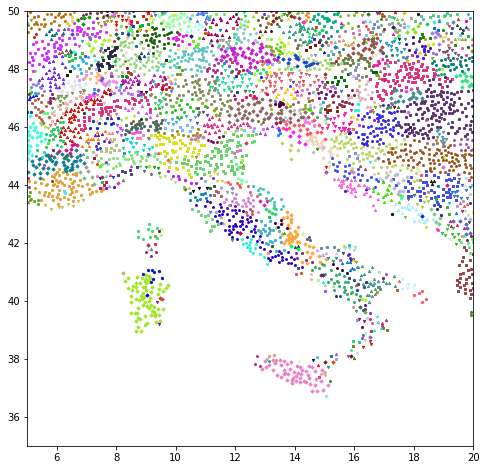

In [29]:
print("# Clusters : " + str(len(clusters_03_c09)))
plot_clusters(clusters_03_c09, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

# Clusters : 357


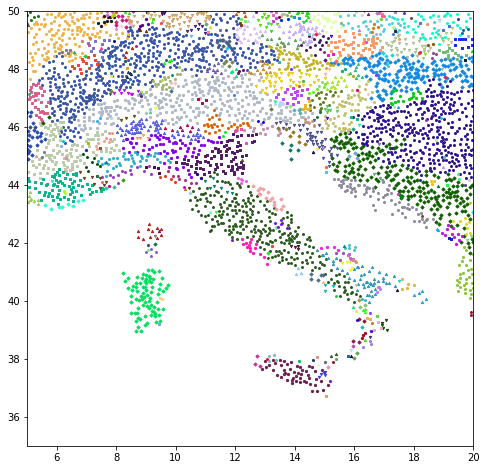

In [31]:
print("# Clusters : " + str(len(clusters_03_c085)))
plot_clusters(clusters_03_c085, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

# Clusters : 565


  6%|▌         | 243/4089 [30:43<8:06:15,  7.59s/it]


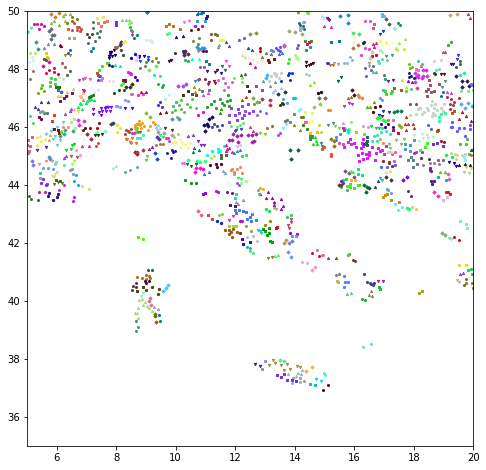

In [196]:
print("# Clusters : " + str(len(clusters_03_c09)))
plot_clusters(clusters_03_c09, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

Computing clusters...


 94%|█████████▎| 3829/4089 [1:15:41<05:08,  1.19s/it]


Clusters computed
# Clusters : 104


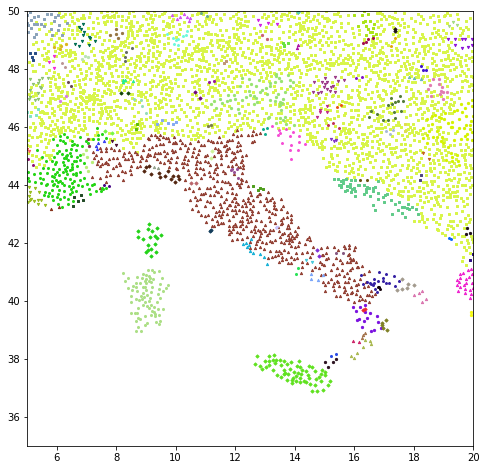

In [197]:
clusters_03_d2 = compute_clusters(df, neighbors_03, method='distance', threshold=2, noise=False)
print("# Clusters : " + str(len(clusters_03_d2)))
plot_clusters(clusters_03_d2, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

Computing clusters...


 98%|█████████▊| 3990/4089 [1:29:42<02:13,  1.35s/it]


Clusters computed
# Clusters : 40


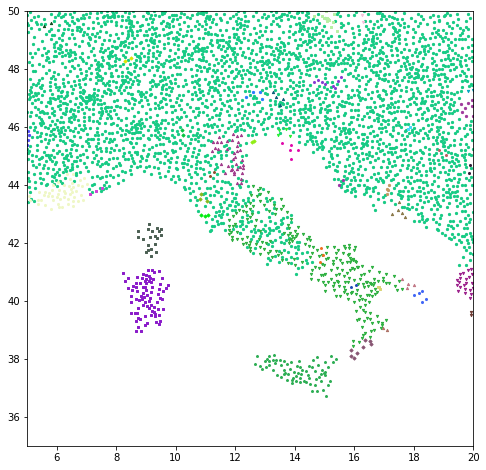

In [198]:
clusters_03_d2_5 = compute_clusters(df, neighbors_03, method='distance', threshold=2.5, noise=False)
print("# Clusters : " + str(len(clusters_03_d2_5)))
plot_clusters(clusters_03_d2_5, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

# Clusters : 22


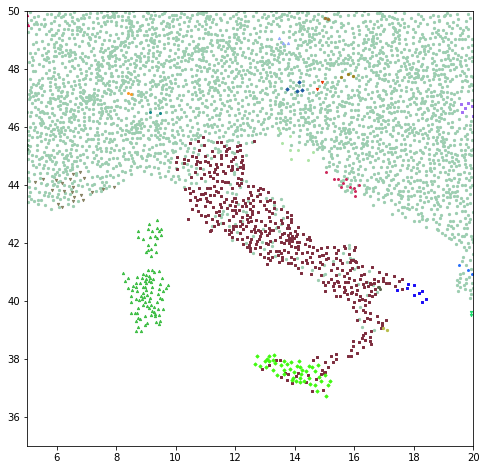

In [150]:
print("# Clusters : " + str(len(clusters_05_d2_5)))
plot_clusters(clusters_05_d2_5, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

# Clusters : 84


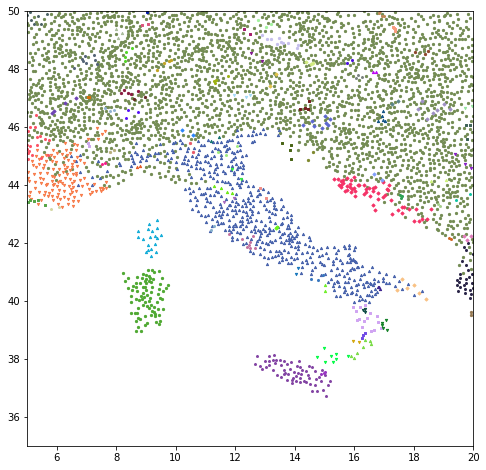

In [133]:
print("# Clusters : " + str(len(clusters_05_d2)))
plot_clusters(clusters_05_d2, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

# Clusters : 160


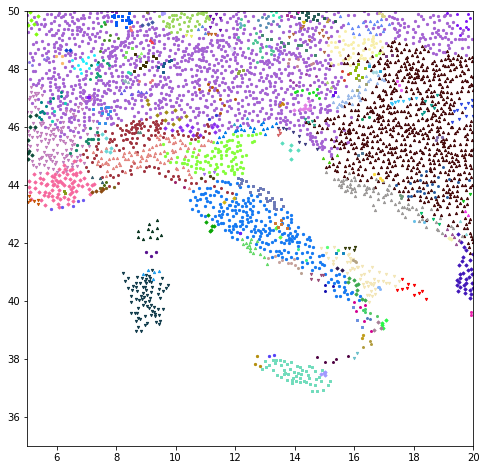

In [148]:
print("# Clusters : " + str(len(clusters_05_d1_7)))
plot_clusters(clusters_05_d1_7, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

# Clusters : 255


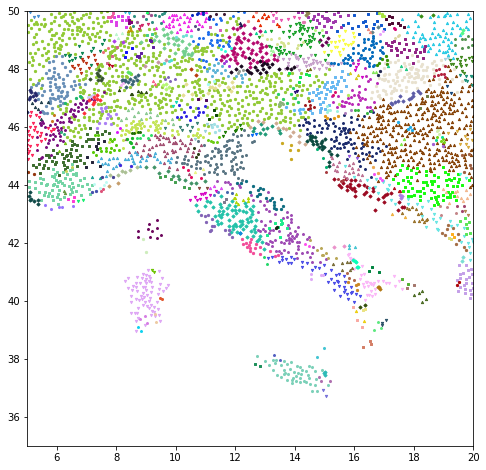

In [138]:
print("# Clusters : " + str(len(clusters_05_d1_5)))
plot_clusters(clusters_05_d1_5, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

# Clusters : 569


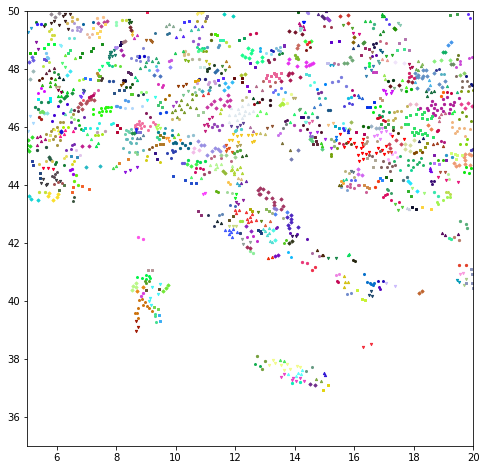

In [136]:
print("# Clusters : " + str(len(clusters_05_d1)))
plot_clusters(clusters_05_d1, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

# Clusters : 39


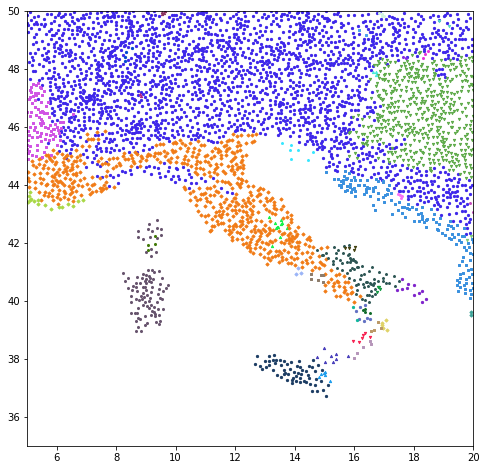

In [50]:
print("# Clusters : " + str(len(clusters_05_07)))
plot_clusters(clusters_05_07, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

# Clusters : 81


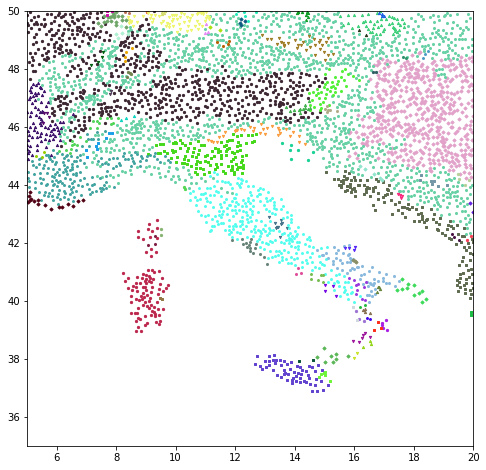

In [108]:
print("# Clusters : " + str(len(clusters_05_08)))
plot_clusters(clusters_05_08, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

# Clusters : 157


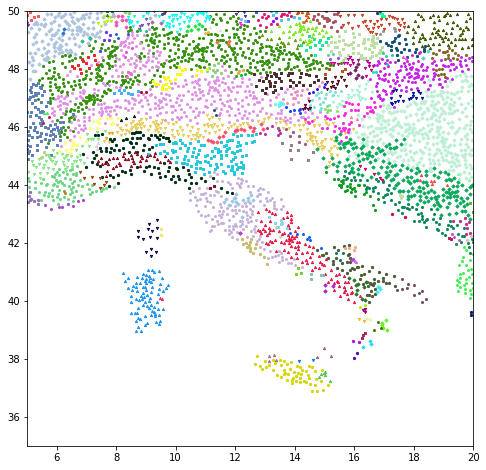

In [110]:
print("# Clusters : " + str(len(clusters_05_085)))
plot_clusters(clusters_05_085, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

# Clusters : 347


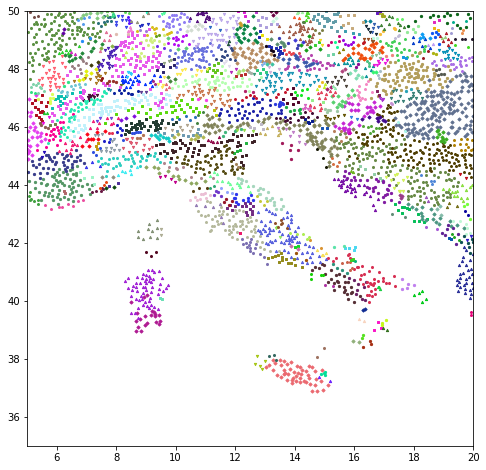

In [112]:
print("# Clusters : " + str(len(clusters_05_09)))
plot_clusters(clusters_05_09, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

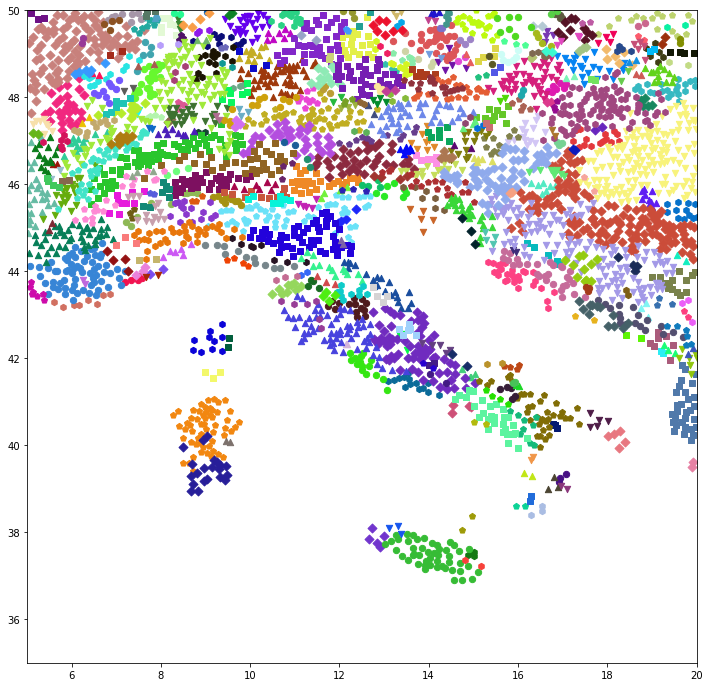

In [32]:
plot_clusters(clusters_05_09n, figsize=(12,12), s=40, xmin=5, xmax=20, ymin=35, ymax=50)

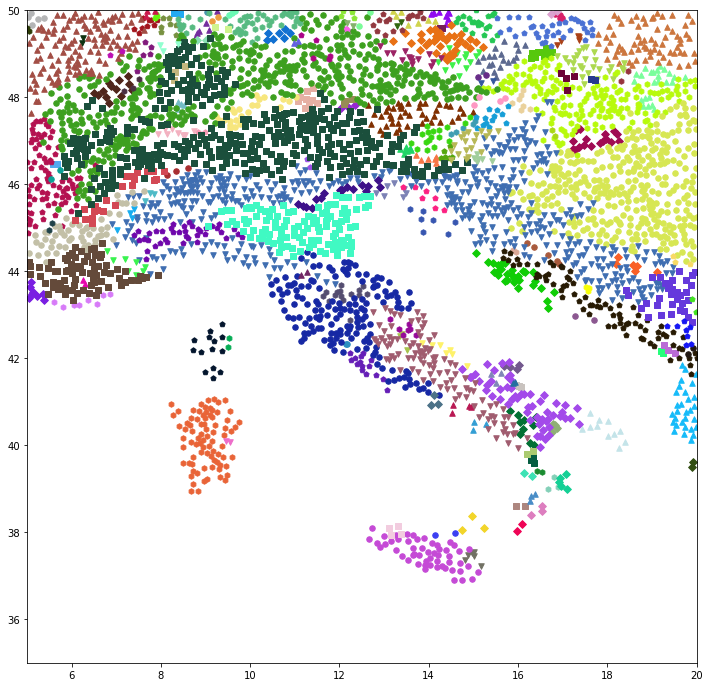

In [34]:
plot_clusters(clusters_05_085n, figsize=(12,12), s=30, xmin=5, xmax=20, ymin=35, ymax=50)

Computing aggregations...


4835it [31:34,  2.55it/s]                          


Aggregations computed
305


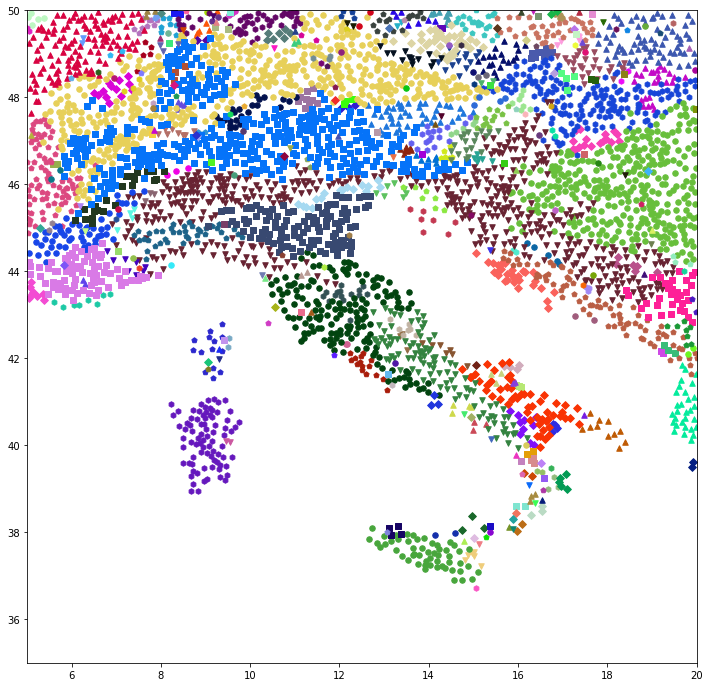

In [42]:
clusters_05_085 = CorrelationClustering(new_df, neighbors_05).compute_clusters(threshold=0.85)
print(len(clusters_05_085))
plot_clusters(clusters_05_085, figsize=(12,12), s=30, xmin=5, xmax=20, ymin=35, ymax=50)

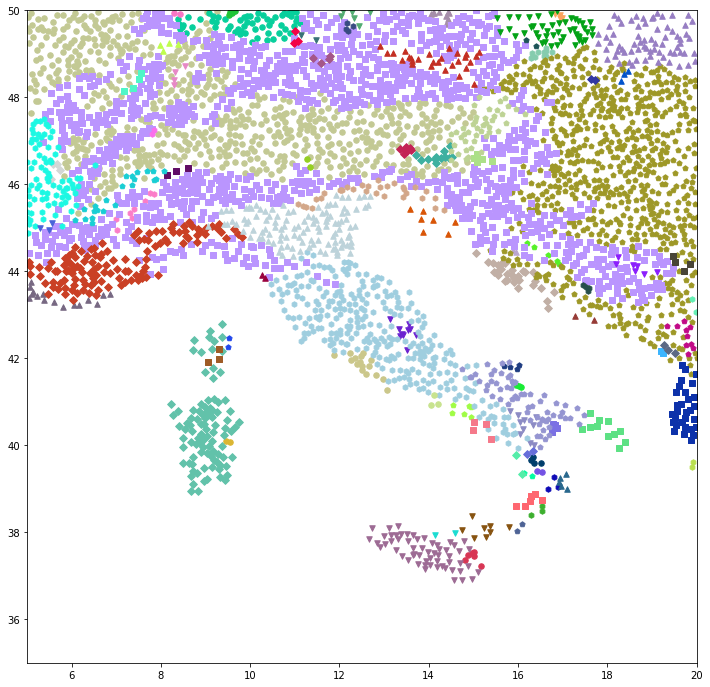

In [38]:
plot_clusters(clusters_05_08n, figsize=(12,12), s=30, xmin=5, xmax=20, ymin=35, ymax=50)

Computing aggregations...


 45%|████▍     | 1828/4089 [16:47<20:45,  1.81it/s]  


Aggregations computed
651


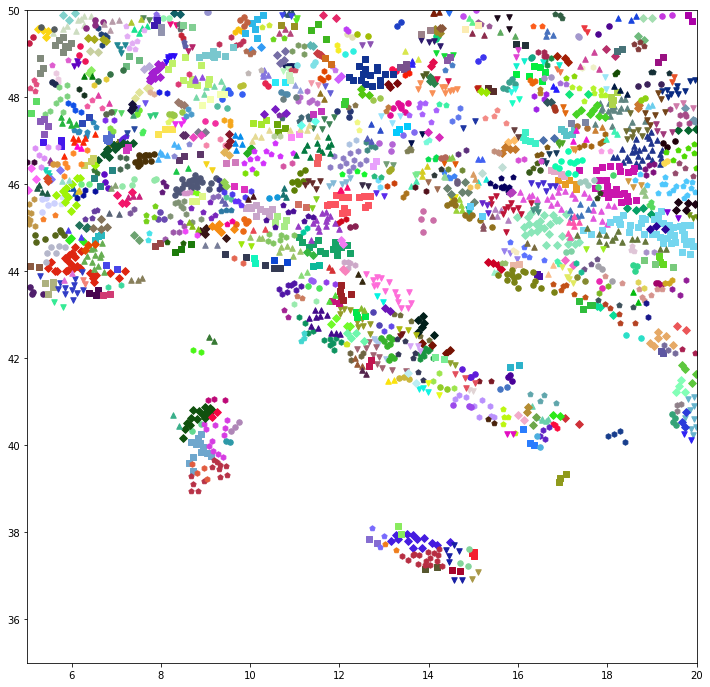

In [40]:
clusters_05_095n = CorrelationClustering(new_df, neighbors_05).compute_clusters(threshold=0.95)
print(len(clusters_05_095n))
plot_clusters(clusters_05_095n, figsize=(12,12), s=30, xmin=5, xmax=20, ymin=35, ymax=50)